# Линейная регрессия

Последовательность работы:
1. Постановка задачи
2. Сбор, анализ, подготовка данных
3. Обучение модели
4. Оценка модели

## Для работы подключите датасет Housing Prices Competition

см. две картинки ниже

### 1) Во вкладке справа добавить input (если вкладка не открыта, то справа вверху экрана нажать стрелку)
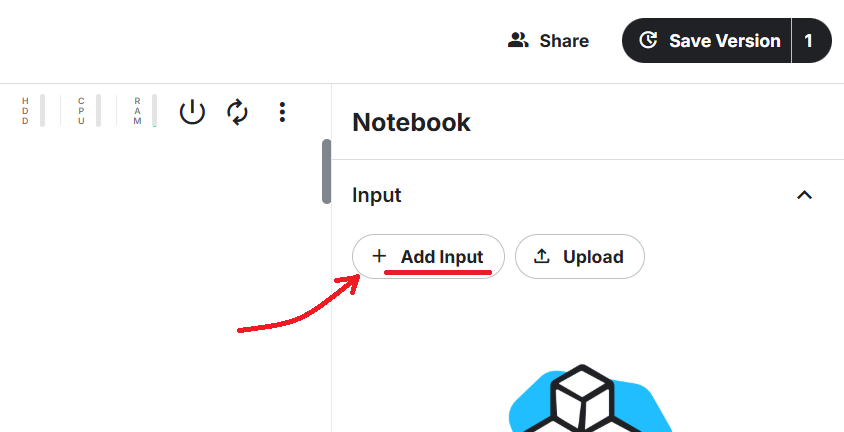

### 2) Ввести в поиск *Housing Prices*, нажать плюс
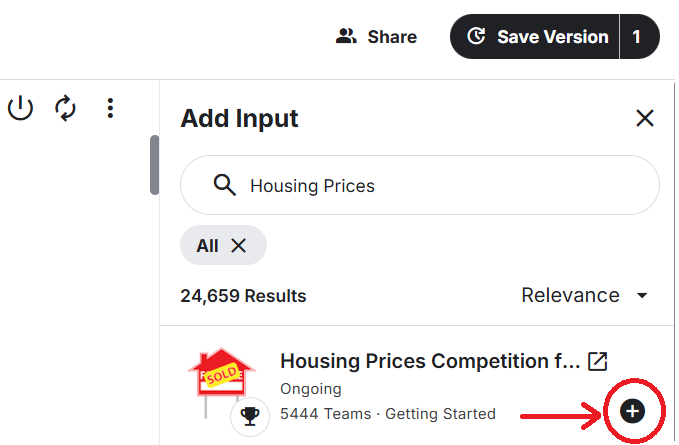

# Какие инструменты мы будем использовать

Библиотеки питона, которые мы сегодня используем

* pandas - стандартная библиотека для работы с табличными данными
* sklearn - библиотека с метриками, методами предобработки данных, моделями машинного обучения и многим другим
* matplotlib - самая популярная библиотека для рисования графиков на питоне
* numpy — библиотека для работы с многомерными массивами

In [28]:
# импортируем библиотеки
import pandas as pd # библиотека для табличных данных
import numpy as np  # для числовых операций
import matplotlib.pyplot as plt # для графиков
import seaborn as sns

# Постановка задачи

## Предсказать цену на жильё на основе имеющихся данных

Регрессия в машинном обучении — это тип задачи, которая предсказывает числовые значения на основе данных.

https://www.kaggle.com/competitions/home-data-for-ml-course/overview

## Загрузка набора данных

In [29]:
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', sep=',')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [30]:
df[df["SalePrice"]>600000] # фильтрация

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [31]:
df[['Id','Street']]#[:3]

,Id,Street
0,1,Pave
1,2,Pave
2,3,Pave
3,4,Pave
4,5,Pave
...,...,...
1455,1456,Pave
1456,1457,Pave
1457,1458,Pave
1458,1459,Pave


In [32]:
df['Street'].unique() #уникальные значения столбца

array(['Pave', 'Grvl'], dtype=object)

In [33]:
df[['Id','Street']][df['Street'] == 'Grvl'] # фильтрация

,Id,Street
52,53,Grvl
335,336,Grvl
582,583,Grvl
812,813,Grvl
1061,1062,Grvl
1184,1185,Grvl


In [34]:
df.drop(['Id', 'Street'], axis=1).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df.iloc[:3, 3:5] #получение строк по числовым индексам

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250


In [36]:
df[['Id', 'SalePrice']].sort_values('SalePrice', ascending=False) # сортировка

,Id,SalePrice
691,692,755000
1182,1183,745000
1169,1170,625000
898,899,611657
803,804,582933
...,...,...
30,31,40000
533,534,39300
968,969,37900
916,917,35311


## Исследовательский анализ данных

In [37]:
df.info() # просмотр типов переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [39]:
df.isnull().sum() # проверка на пропущенные значения

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [40]:
miss = df.isnull().sum()
miss = miss[miss>0].sort_values(ascending=False)
miss

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [41]:
df.describe() # статистические показатели

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


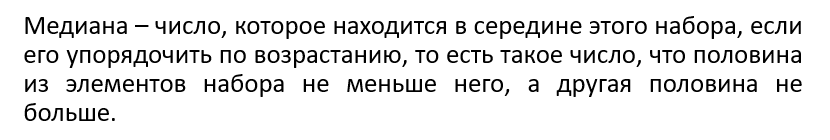

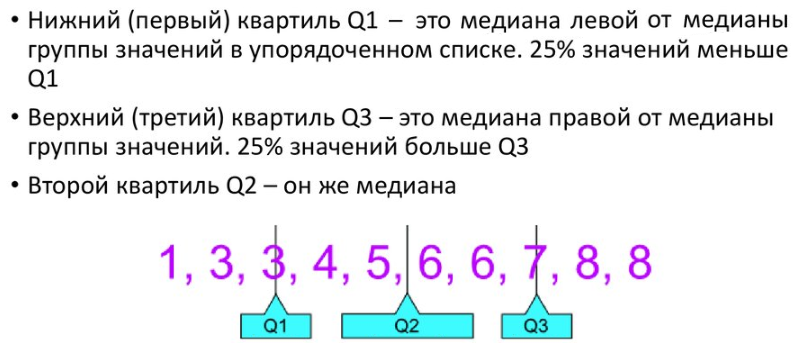

Text(0, 0.5, "The property's sale price in dollars")

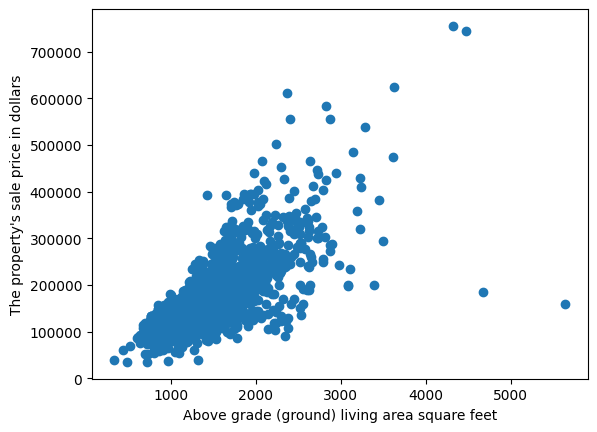

In [42]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('The property\'s sale price in dollars')

In [43]:
corr_matrix = df[numerical_cols.tolist()].corr()
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


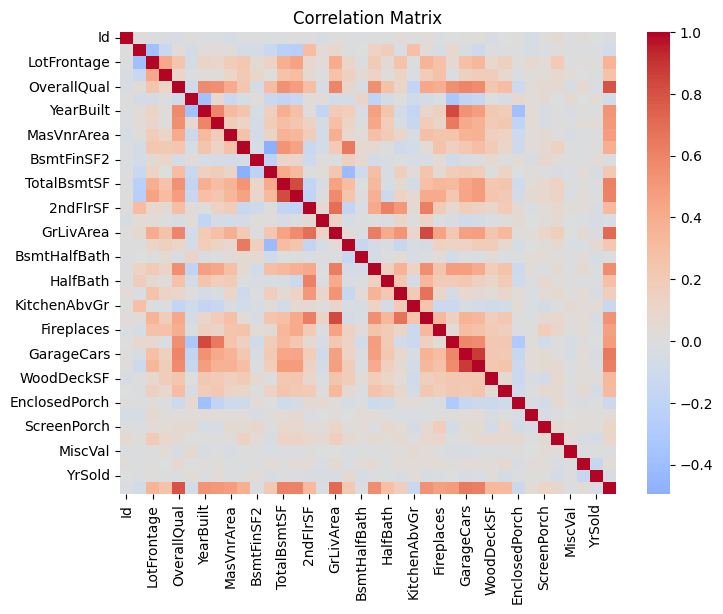

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, "The property's sale price in dollars")

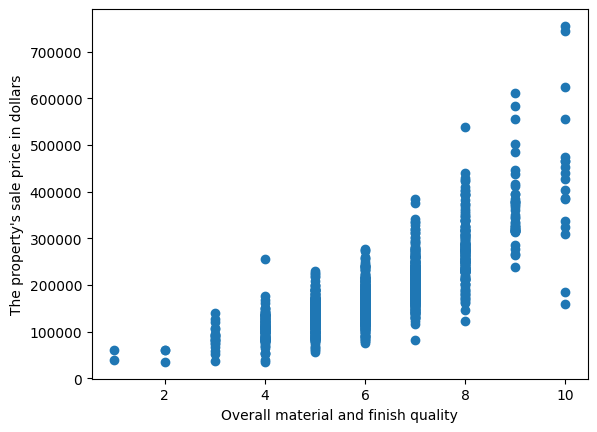

In [45]:
# построим график
plt.scatter(df['OverallQual'], df['SalePrice'])

plt.xlabel('Overall material and finish quality')
plt.ylabel('The property\'s sale price in dollars')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


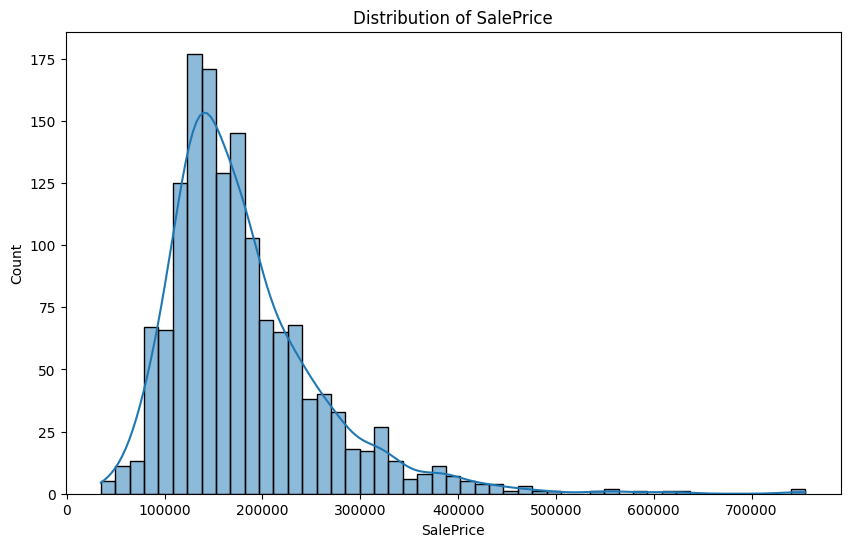

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


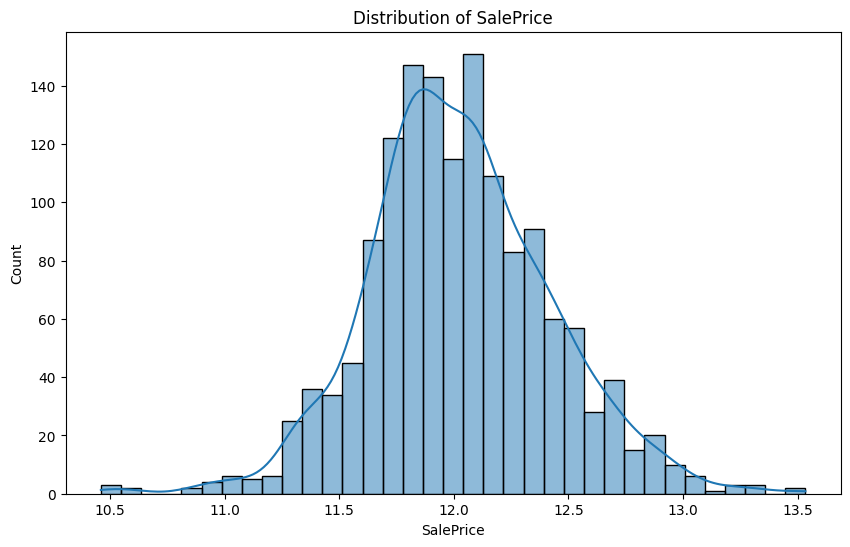

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['SalePrice']), kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.show()

In [48]:
# ищем признаки с наиболее высокой корреляцией с целевой переменной

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols.tolist()].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [49]:
# взаимная корреляция признаков
df['GarageCars'].corr(df['GarageArea'])

0.8824754142814629

In [50]:
# берем признаки с наиболее высокой корреляцией с целевой переменной

X = df[['GrLivArea', 'OverallQual','GarageCars']]
y = df['SalePrice']

In [51]:
X.isnull().sum()

GrLivArea      0
OverallQual    0
GarageCars     0
dtype: int64

In [52]:
# разобьем данные на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # размер тестовой выборки составит 20%

## Линейная регрессия

In [53]:
# импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

### Геометрический смысл

In [54]:
X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0, 0.5, "The property's sale price in dollars")

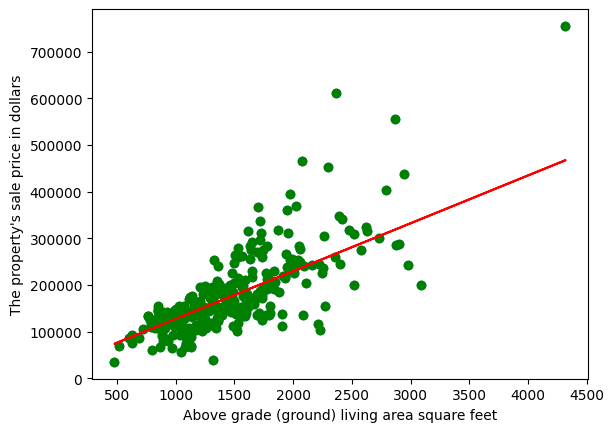

In [55]:
# построим график
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_pred, color = 'red')

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('The property\'s sale price in dollars')

Линейная регрессия:
* Хорошо работает, если зависимость между целевой переменной и признаками имеет линейный характер
* Хорошо интерпретируется
* Перед использованием лучше провести нормализацию данных, т.к масштаб влияет на веса

## Обучение базовой модели

In [56]:
# создадим модель класса LinearRegression
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

Теперь сделаем предсказания с помощью метода **.predict(X)**. Заметьте, что в метод **.fit(X, y)** мы подавали матрицу с признаками и вектор с правильными ответами. В метод **.predict(X)** мы подаем только матрицу с признаками, потому что мы хотим сделать предсказание.

In [57]:
y_pred = model.predict(X_test)

#print(y_pred)

Проверим результат. Воспользуемся метрикой RMSE

In [58]:
from sklearn import metrics

# средняя абсолютная ошибка
print('MAE = ', metrics.mean_absolute_error(y_test, y_pred))

# корень среднеквадратической ошибки
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# коэффициент детерминации r-квадрат
# ~ доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью
# 1-(D[ошибки модели]/D[целевой переменной])
print('R2 = ', metrics.r2_score(y_test, y_pred))

# средняя абсолютная процентная ошибка
print('MAPE = ', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAE =  38341.20447642107
RMSE =  58471.75652552955
R2 =  0.5542632452871117
MAPE =  0.23341892742108164


## Улучшения

In [59]:
#добавим логарифм цены
df['logSalePrice'] = np.log1p(df['SalePrice'])

#обратная - np.expm1
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016


In [60]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  0.19393989678864892


In [61]:
print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))
print('R2 = ', metrics.r2_score(np.expm1(y_test), np.expm1(y_pred)))

RMSE =  35505.805724672675
R2 =  0.8356442469191268


### Нормализация

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


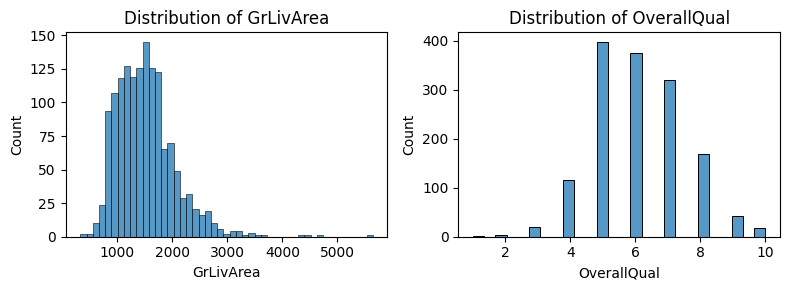

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(df['GrLivArea'], ax=axes[0])
axes[0].set_title('Distribution of GrLivArea')

sns.histplot(df['OverallQual'], ax=axes[1])
axes[1].set_title('Distribution of OverallQual')

plt.tight_layout()
plt.show()

<Axes: xlabel='GrLivArea'>

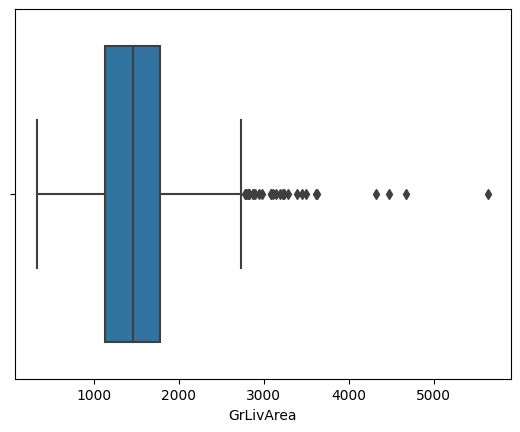

In [63]:
sns.boxplot(x=df['GrLivArea'])

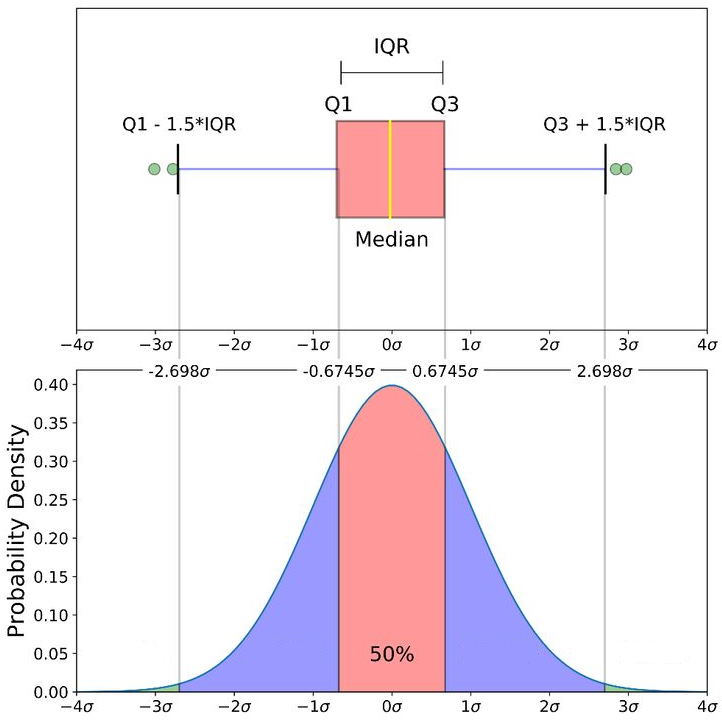

In [64]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

In [65]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
minmax_df = pd.DataFrame(minmax_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = StandardScaler() #приводит к нулевому среднему и единичному стандартному отклонению
standard_df = scaler.fit_transform(X)
standard_df = pd.DataFrame(standard_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = RobustScaler() # использует медиану и межквартильный размах
robust_df = scaler.fit_transform(X)
robust_df = pd.DataFrame(robust_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

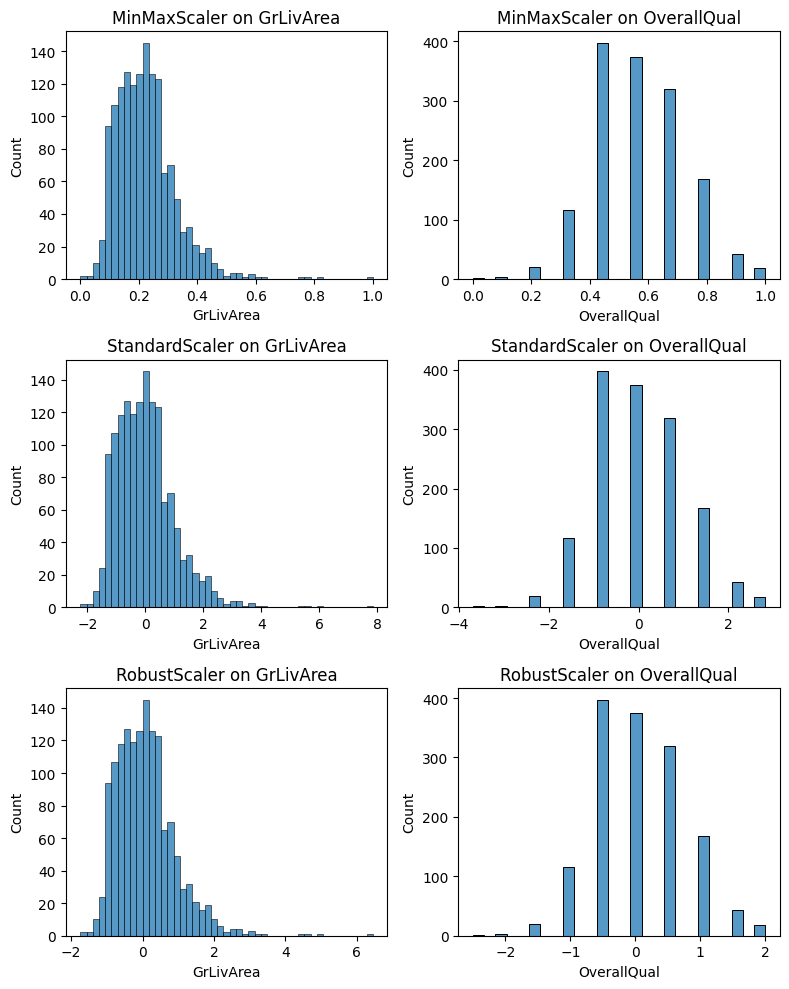

In [66]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))

sns.histplot(minmax_df['GrLivArea'], ax=axes[0, 0])
axes[0, 0].set_title('MinMaxScaler on GrLivArea')

sns.histplot(minmax_df['OverallQual'], ax=axes[0, 1])
axes[0, 1].set_title('MinMaxScaler on OverallQual')

sns.histplot(standard_df['GrLivArea'], ax=axes[1, 0])
axes[1, 0].set_title('StandardScaler on GrLivArea')

sns.histplot(standard_df['OverallQual'], ax=axes[1, 1])
axes[1, 1].set_title('StandardScaler on OverallQual')

sns.histplot(robust_df['GrLivArea'], ax=axes[2, 0])
axes[2, 0].set_title('RobustScaler on GrLivArea')

sns.histplot(robust_df['OverallQual'], ax=axes[2, 1])
axes[2, 1].set_title('RobustScaler on OverallQual')

plt.tight_layout()
plt.show()

In [67]:
X = robust_df[['OverallQual', 'GarageCars', 'GrLivArea']]

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  43032.150480414624


### Выбросы

In [68]:
#Неправильно (хоть результат и кажется приятным)

df_filtered = df[df["GrLivArea"]<4000]

X = df_filtered[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df_filtered['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  35702.09888359374


In [69]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

outliers = X_train[X_train["GrLivArea"]>4000].index

In [70]:
X_train = X_train.drop(outliers)
y_train = y_train.drop(outliers)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE =  42521.557863140835


In [71]:
corr_matrix["SalePrice"].sort_values(ascending=False).index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [90]:
X = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage']]

### Заполнение пропусков

In [93]:
X.isnull().sum().sort_values(ascending=False)[:4]

GarageYrBlt    81
SalePrice       0
OverallQual     0
GrLivArea       0
dtype: int64

In [74]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GarageYrBlt', ylabel='Count'>

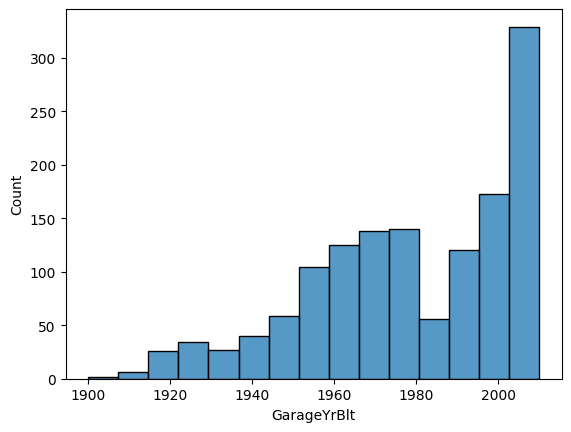

In [75]:
sns.histplot(x=df['GarageYrBlt'])

In [76]:
df['LotFrontage'].mean()

70.04995836802665

In [77]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [94]:
df['GarageYrBlt'].mode()[0]

2005.0

In [96]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

## Сравнение

In [97]:
X = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage']]

In [98]:
y = df['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))

RMSE =  61333.2258152511
